In [1]:

"""
RQ2: how is the bias mitigation????

lol literally outperforms everything in all metrics with some small exceptions
outperforms everything for every example for aspd, spd, di, sf


For Adult sex:
horrible predictive performance but 10x better bias than the best debias...... actually not a usable example
For Adult race:
NOTE: for some models the performance loss seems better than others!!!
--- not as different in performance. still bad tho.
- bias much better  than all others for aspd, spd, di, sf
- FM and RW slightly better AEOD (sliiightly)

add a rq abt diff ml models and use:
nn, DT, RF, SVM, NB, LGR
maybe find a reason to remote dt and just 

TODO: checkout results with just nn
"""

'\nRQ2: how is the bias mitigation????\n\nlol literally outperforms everything in all metrics with some small exceptions\noutperforms everything for every example for aspd, spd, di, sf\n\n\nFor Adult sex:\nhorrible predictive performance but 10x better bias than the best debias...... actually not a usable example\nFor Adult race:\nNOTE: for some models the performance loss seems better than others!!!\n--- not as different in performance. still bad tho.\n- bias much better  than all others for aspd, spd, di, sf\n- FM and RW slightly better AEOD (sliiightly)\n\nadd a rq abt diff ml models and use:\nnn, DT, RF, SVM, NB, LGR\nmaybe find a reason to remote dt and just \n\nTODO: checkout results with just nn\n'

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

from experiment_utils import *
from src import *
%matplotlib agg



pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


# SAVE TO RESULTS FILE

In [3]:
model_names = [
    ["NN","nn keras"],
    ["LR","LogisticRegression"],
]

In [4]:
FOLDER = "RQ2_BIAS_MIT"

if not os.path.exists(FOLDER):
    os.makedirs(FOLDER)

In [5]:
# DEFAULT FOR NOW SEPARATE

for attr in [["sex"]]:            
    files = [os.path.join("results","defualt_"+'_'.join(attr)+".csv")]
    reader = ResultsReader(files)
        
    df = reader.get_mean_metrics()
    df = df[(~df["bias mitigation"].str.contains('FYP VAE')) | df["other"].str.contains('Sensitive KL loss') & df["other"].str.contains('Flipped') ]

    for model_short, model_long in model_names:
        model_df = df[(df[reader.ML].str.contains(model_long))]
        mean_df = model_df.groupby(reader.filterable).mean().reset_index()
        mean_df.to_csv(os.path.join(FOLDER, model_short+"_DEFAULT_MEAN_"+'_'.join(attr)+'.csv'), index=False)
      
    """  
    df = reader.get_filtered_df()    
    for model_short, model_long in model_names:
        model_df = df[(df[reader.ML].str.contains(model_long))]
        mean_df = model_df.groupby(reader.filterable).std().reset_index()
        mean_df.to_csv(os.path.join(FOLDER,model_short+"_STD_"+'_'.join(attr)+'.csv'), index=False)
    """



File 'results\defualt_sex.csv' successfully loaded as DataFrame.


In [6]:

for attr in [["sex"],["race"]]:            
    files = [os.path.join("results","RESULTS_"+'_'.join(attr)+".csv")]
    reader = ResultsReader(files)
        
    df = reader.get_mean_metrics()
    df = df[(~df["bias mitigation"].str.contains('FYP VAE')) | df["other"].str.contains('Sensitive KL loss') & df["other"].str.contains('Flipped') ]

    for model_short, model_long in model_names:
        model_df = df[(df[reader.ML].str.contains(model_long))]
        mean_df = model_df.groupby(reader.filterable).mean().reset_index()
        mean_df.to_csv(os.path.join(FOLDER, model_short+"_MEAN_"+'_'.join(attr)+'.csv'), index=False)
      
    """  
    df = reader.get_filtered_df()    
    for model_short, model_long in model_names:
        model_df = df[(df[reader.ML].str.contains(model_long))]
        mean_df = model_df.groupby(reader.filterable).std().reset_index()
        mean_df.to_csv(os.path.join(FOLDER,model_short+"_STD_"+'_'.join(attr)+'.csv'), index=False)
    """



File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.


PermissionError: [Errno 13] Permission denied: 'RQ2_BIAS_MIT\\NN_MEAN_sex.csv'

In [ ]:
FOLDER = "RQ3_MULTIATTR"

if not os.path.exists(FOLDER):
    os.makedirs(FOLDER)

In [ ]:
for attr in [["race", "sex"]]:            
    files = [os.path.join("results","RESULTS_"+'_'.join(attr)+".csv")]
    reader = ResultsReader(files)
        
    df = reader.get_mean_metrics()
    for model_short, model_long in model_names:
        model_df = df[(df[reader.ML].str.contains(model_long))]
        mean_df = model_df.groupby(reader.filterable).mean().reset_index()
        mean_df.to_csv(os.path.join(FOLDER, model_short+"_MEAN_"+'_'.join(attr)+'.csv'), index=False)

File 'results\RESULTS_race_sex.csv' successfully loaded as DataFrame.


In [ ]:
# TODO: add maybe a version with just the subset of rows (e.g. only my best methods) and subsets of metrics that I like the most and keep the current ones as "full version"
# also i think it would be fair to have a table for each ML model jst only present the 2nd one in the RQ (just mean should be enought tho)


# NOTE: insteadd in sheets have some formulas that transform the full table into a subset!

# VIS

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

from experiment_utils import *
from src import *


pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


In [2]:
import seaborn as sns   

palette = sns.color_palette("flare", 3)
#palette = sns.color_palette("coolwarm_r", 2)
#palette = sns.color_palette("Spectral", 2)
#palette = sns.color_palette("husl", 2)

In [40]:
sns.color_palette("flare", 15)

[(0.92392172, 0.62835879, 0.46665526),
 (0.9173814, 0.56750099, 0.4298371),
 (0.90921368, 0.5056543, 0.39544411),
 (0.89737819, 0.44322747, 0.37043052),
 (0.87947728, 0.38172422, 0.35953127),
 (0.8513284, 0.32604977, 0.36620106),
 (0.81085964, 0.28202508, 0.38509649),
 (0.75861834, 0.25356035, 0.40663694),
 (0.69970218, 0.23611179, 0.42313282),
 (0.64061624, 0.22016818, 0.43446845),
 (0.5822395, 0.20425693, 0.44098758),
 (0.52386353, 0.18939409, 0.44182449),
 (0.46446454, 0.17716458, 0.43486036),
 (0.40504765, 0.16574261, 0.42072062),
 (0.34671861, 0.1529053, 0.40193587)]

In [41]:
sns.color_palette("viridis", 15)

[(0.282327, 0.094955, 0.417331),
 (0.278826, 0.17549, 0.483397),
 (0.258965, 0.251537, 0.524736),
 (0.229739, 0.322361, 0.545706),
 (0.19943, 0.387607, 0.554642),
 (0.172719, 0.448791, 0.557885),
 (0.149039, 0.508051, 0.55725),
 (0.127568, 0.566949, 0.550556),
 (0.120638, 0.625828, 0.533488),
 (0.157851, 0.683765, 0.501686),
 (0.24607, 0.73891, 0.452024),
 (0.369214, 0.788888, 0.382914),
 (0.515992, 0.831158, 0.294279),
 (0.678489, 0.863742, 0.189503),
 (0.845561, 0.887322, 0.099702)]

In [4]:
sns.color_palette("gnuplot",11)

[(0.2869720215917757, 0.0005585182169753714, 0.4946558433997788),
 (0.4058397249567139, 0.004468145735802971, 0.8597998514483723),
 (0.5009794328681196, 0.015809545348320027, 0.9999810273487268),
 (0.5773502691896257, 0.03703703703703703, 0.8660254037844387),
 (0.6447373686314481, 0.07182854256658448, 0.5053251839489484),
 (0.7084919084320762, 0.12647636278656021, 0.0),
 (0.7644041637054289, 0.19949787035152397, 0.0),
 (0.816496580927726, 0.2962962962962962, 0.0),
 (0.8677218312746247, 0.4268577244046407, 0.0),
 (0.9139442639718567, 0.5827982902503562, 0.0),
 (0.9579389640386956, 0.7727286790148584, 0.0)]

In [5]:
def plot_single(grapher, y_metric, x_metric):
    grapher.ax.tick_params(axis='both', which='major', labelsize=6)  # Adjust the font size as needed

    all_metrics = grapher.reader.metrics
    metrics_to_display = [m for m in all_metrics if metric_has_substring(m, [y_metric])]
    grapher.plot_metrics_vs_metric(mean=True, relative=True, metric=x_metric, metrics = metrics_to_display, style=grapher.STYLE_BASE)
    
    grapher.ax.set_ylabel(y_metric)
    grapher.ax.set_xlabel(x_metric)

In [6]:
def plot_multiple_metrics(files, dataset, metrics_to_use = ["SF", "DF"], size = 2.5):
    reader = ResultsReader(files)
    
    def f(df):
        df = df[(df["ML method"].str.contains('nn'))]
        df = df[(df["data"].str.contains(dataset))]
        return df
        
        df['TEMP'] = df['other'].apply(reader._get_losses_used)
        df = df[(~df["bias mitigation"].str.contains('FYP VAE')) | df["TEMP"].str.contains('Sensitive KL loss') ]
        df = df[~(df["TEMP"].str.contains("Flipped"))]
        return df.drop(columns=['TEMP'])
    
    reader.df = f(reader.df)
        
    #reader.relative_metrics_filter = f

    grapher = ResultsGrapher(reader)
    grapher.VERBOSE = False
    grapher.show_legend = False
    grapher.show_plots =  False
    grapher.separate_ml_models = True
    

    F, axes = plt.subplots(2, len(metrics_to_use), figsize=(size*(len(metrics_to_use)), size*2))
    plt.title(dataset)
    
        
    for j, x_metric in enumerate(["f1score", "MCC"]):
        for i, metric in enumerate(metrics_to_use):
            grapher.ax = axes[j][i]
            plot_single(grapher, metric, x_metric)
            
            grapher.ax.set_title(dataset)
                    

    plt.rc('axes', axisbelow=True)
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()
            


In [92]:
def plot_one_run(files, dataset, ax,  y_metric = 'SF', x_metric = 'f1score'):
   
    reader = ResultsReader(files)
    
    def pre(df):
        #
        
        #df = df[(df["ML method"].str.contains('nn'))]
        df = df[(df["data"].str.contains(dataset))]
        
        df['TEMP'] = df['other'].apply(reader._get_losses_used)
        
        # SUBSET OF MY LOSSES
        #df = df[(~df["bias mitigation"].str.contains('FYP VAE')) | df["TEMP"].str.contains('Sensitive KL loss') ]
        #df = df[~(df["TEMP"].str.contains("Flipped"))]
        return df.drop(columns=['TEMP'])
    
    
    reader.df = pre(reader.df)
    
    def f(df): 
        df = df[~(df["ML method"].str.contains('Net'))]
        df["ML method"] = "nn keras" # form making all ml methods the same and show together       
        #df = df[(df["bias mitigation"].str.contains('FYP VAE'))]
        df = df[(df["bias mitigation"].str.contains('FYP VAE')) | (df["bias mitigation"].str.contains('No'))]
        #df = df[(~df["bias mitigation"].str.contains('FYP VAE')) | df["TEMP"].str.contains('Sensitive KL loss') ]
        #df = df[~(df["TEMP"].str.contains("Flipped"))]
        return df
    
    reader.relative_metrics_filter = f

    grapher = ResultsGrapher(reader)
    grapher.VERBOSE = False
    grapher.show_legend = False
    grapher.show_plots =  False
    grapher.separate_ml_models = False
    
    grapher.ax = ax
    plot_single(grapher, y_metric, x_metric)



In [93]:
size = 3.3

In [94]:
files = []
datasets = []
titles = []

files.append(os.path.join("results","MAIN_defualt_sex.csv"))
datasets.append('Default')
titles.append('Default sex')


for dataset in ["Adult", "Compas"]:
    for attr in [["race"], ["sex"]]:            # , ["race", "sex"]
        files.append(os.path.join("results","RESULTS_"+'_'.join(attr)+".csv"))
        datasets.append(dataset)
        titles.append(dataset + ' ' + str(attr))

print(files)
print(datasets)

['results\\MAIN_defualt_sex.csv', 'results\\RESULTS_race.csv', 'results\\RESULTS_sex.csv', 'results\\RESULTS_race.csv', 'results\\RESULTS_sex.csv']
['Default', 'Adult', 'Adult', 'Compas', 'Compas']


File 'results\MAIN_defualt_sex.csv' successfully loaded as DataFrame.
File 'results\RESULTS_race.csv' successfully loaded as DataFrame.
File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.
File 'results\RESULTS_race.csv' successfully loaded as DataFrame.
File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.


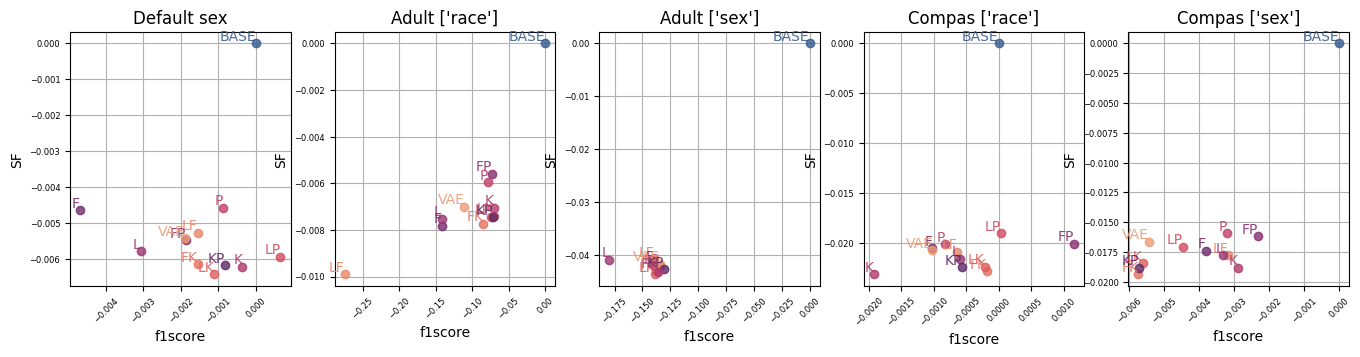

In [95]:
# ALL MODELS
F, axes = plt.subplots(1, 5, figsize=(size*(5), size))


for i in range(5):
    plot_one_run(files[i], datasets[i], axes[i])
    axes[i].set_title(titles[i])
    
plt.rc('axes', axisbelow=True)
plt.show()

File 'results\MAIN_defualt_sex.csv' successfully loaded as DataFrame.
File 'results\RESULTS_race.csv' successfully loaded as DataFrame.
File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.
File 'results\RESULTS_race.csv' successfully loaded as DataFrame.
File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.


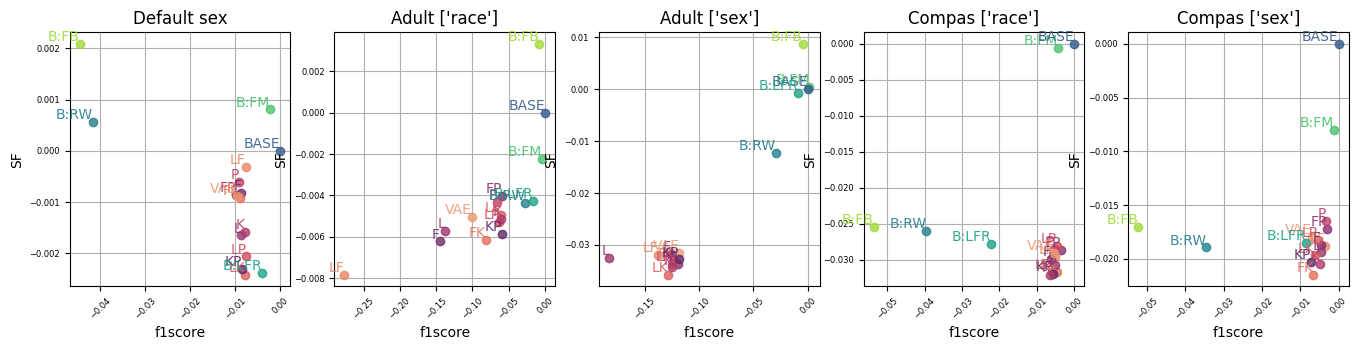

In [87]:
# NN
F, axes = plt.subplots(1, 5, figsize=(size*(5), size))


for i in range(5):
    plot_one_run(files[i], datasets[i], axes[i])
    axes[i].set_title(titles[i])
    
plt.rc('axes', axisbelow=True)
plt.show()

File 'results\MAIN_defualt_sex.csv' successfully loaded as DataFrame.
File 'results\RESULTS_race.csv' successfully loaded as DataFrame.
File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.
File 'results\RESULTS_race.csv' successfully loaded as DataFrame.
File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.


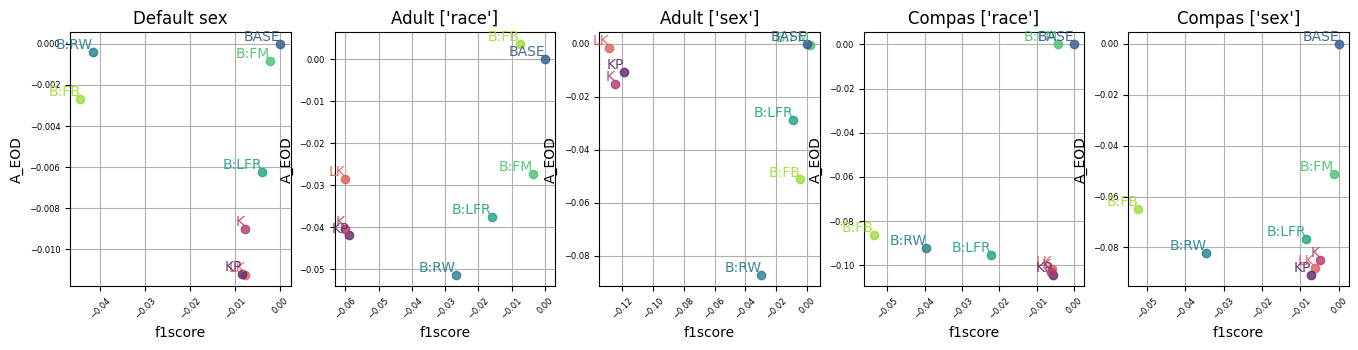

In [71]:
F, axes = plt.subplots(1, 5, figsize=(size*(5), size))


for i in range(5):
    plot_one_run(files[i], datasets[i], axes[i], "A_EOD")
    axes[i].set_title(titles[i])
    
plt.rc('axes', axisbelow=True)
plt.show()

File 'results\MAIN_defualt_sex.csv' successfully loaded as DataFrame.
File 'results\RESULTS_race.csv' successfully loaded as DataFrame.
File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.
File 'results\RESULTS_race.csv' successfully loaded as DataFrame.
File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.


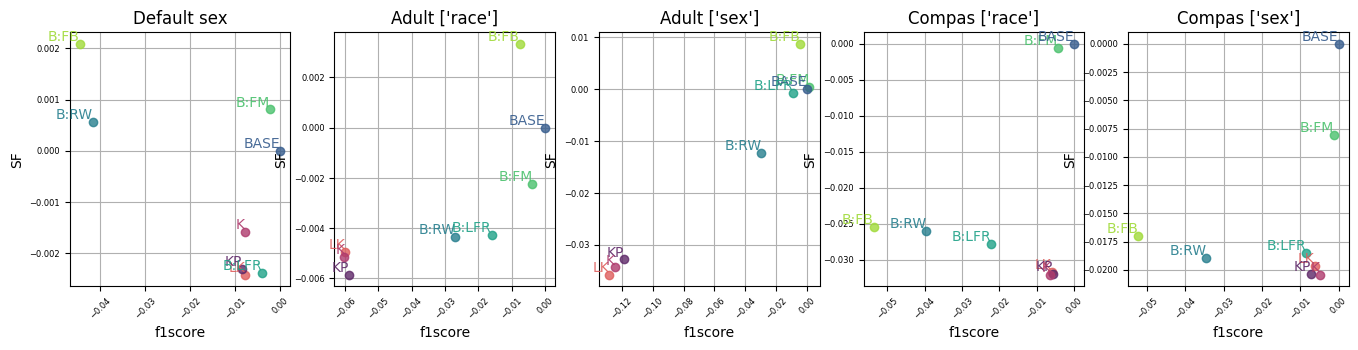

In [72]:
F, axes = plt.subplots(1, 5, figsize=(size*(5), size))


for i in range(5):
    plot_one_run(files[i], datasets[i], axes[i])
    axes[i].set_title(titles[i])
    
plt.rc('axes', axisbelow=True)
plt.show()

File 'results\MAIN_defualt_sex.csv' successfully loaded as DataFrame.
File 'results\RESULTS_race.csv' successfully loaded as DataFrame.
File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.
File 'results\RESULTS_race.csv' successfully loaded as DataFrame.
File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.


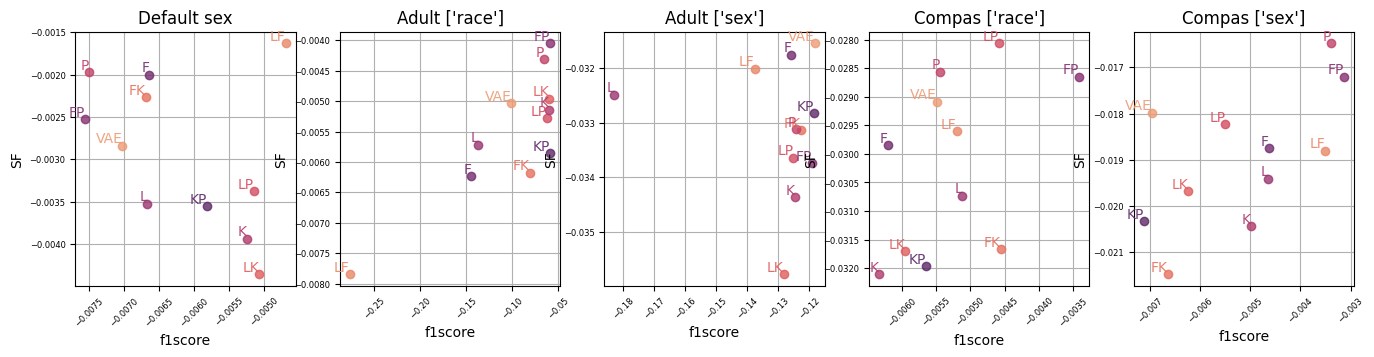

In [29]:
F, axes = plt.subplots(1, 5, figsize=(size*(5), size))


for i in range(5):
    plot_one_run(files[i], datasets[i], axes[i], "SF")
    axes[i].set_title(titles[i])
    
plt.rc('axes', axisbelow=True)
plt.show()

File 'results\MAIN_defualt_sex.csv' successfully loaded as DataFrame.
File 'results\RESULTS_race.csv' successfully loaded as DataFrame.
File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.
File 'results\RESULTS_race.csv' successfully loaded as DataFrame.
File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.


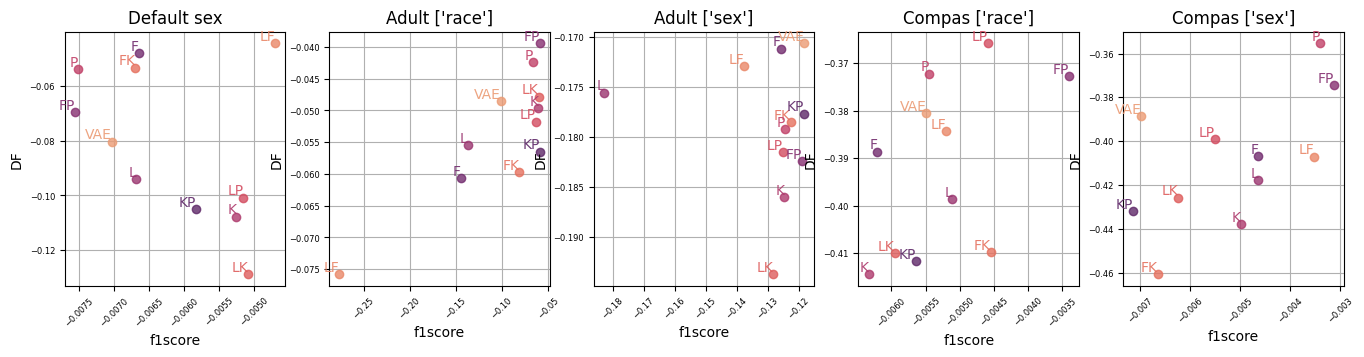

In [27]:
F, axes = plt.subplots(1, 5, figsize=(size*(5), size))


for i in range(5):
    plot_one_run(files[i], datasets[i], axes[i])
    axes[i].set_title(titles[i])
    
plt.rc('axes', axisbelow=True)
plt.show()

In [11]:
multi_files = []
multi_datasets = []
multi_titles = []

for attr in [["race", "sex"]]:            # , ["race", "sex"]
    for dataset in  ["Adult", "Compas"]:
        multi_files.append(os.path.join("results","RESULTS_"+'_'.join(attr)+".csv"))
        multi_datasets.append("Compas")
        #datasets.append(dataset)
        multi_titles.append(dataset + ' ' + str(attr))

print(multi_files)
print(multi_datasets)

['results\\RESULTS_race_sex.csv', 'results\\RESULTS_race_sex.csv']
['Compas', 'Compas']


File 'results\RESULTS_race_sex.csv' successfully loaded as DataFrame.
File 'results\RESULTS_race_sex.csv' successfully loaded as DataFrame.


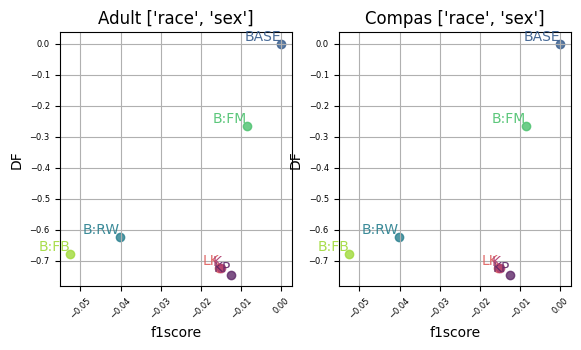

In [12]:
F, axes = plt.subplots(1, 2, figsize=(size*(2), size))


for i in range(2):
    plot_one_run(multi_files[i], multi_datasets[i], axes[i])
    axes[i].set_title(multi_titles[i])
    
plt.rc('axes', axisbelow=True)

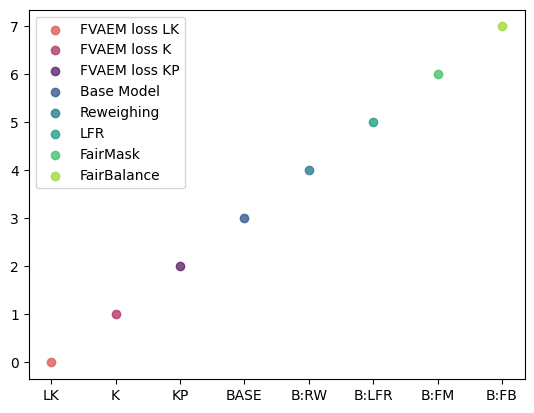

In [13]:
# LEGEND!
grapher = ResultsGrapher(None)
labels  = ["LK","K","KP",'BASE',"B:RW","B:LFR","B:FM","B:FB"]
for i, l in enumerate(labels):
    plt.scatter(
            l,
            i,
            label=grapher._get_legend_text(l, l),
            color=grapher.get_color(l),
            alpha=0.8,
        )
plt.legend()
plt.show()

# CHECK OUT ALL COMBOS

File 'results\MAIN_defualt_sex.csv' successfully loaded as DataFrame.


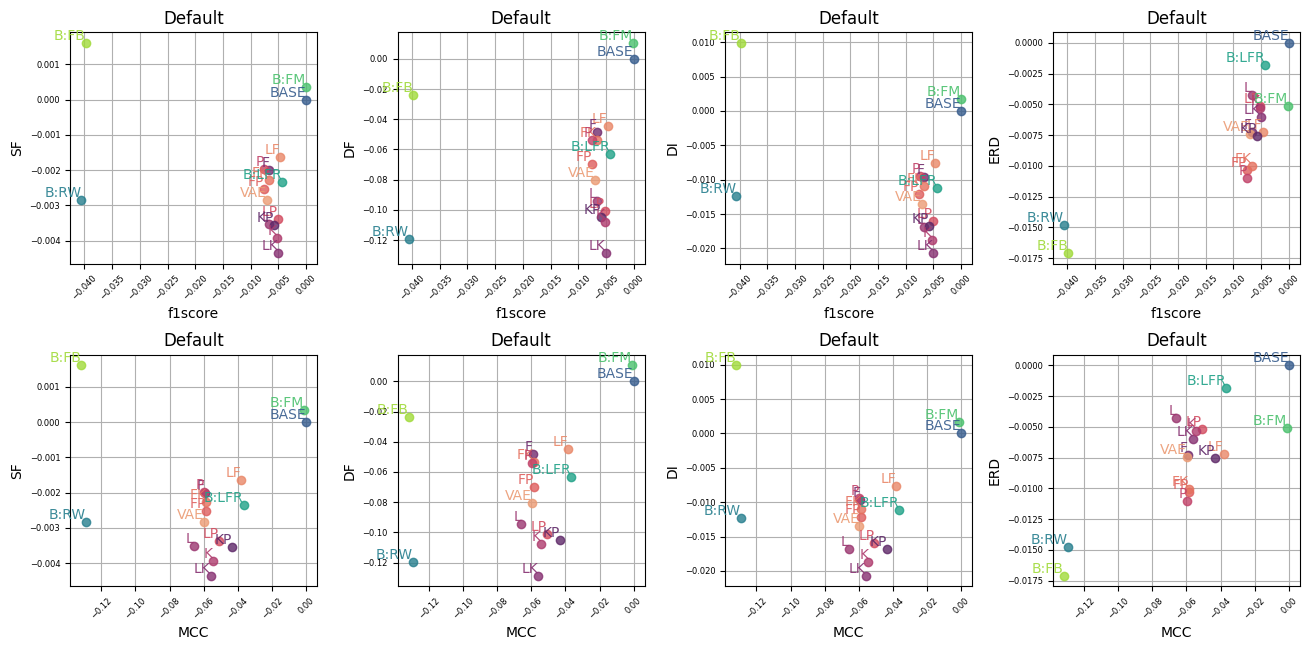

File 'results\RESULTS_race.csv' successfully loaded as DataFrame.


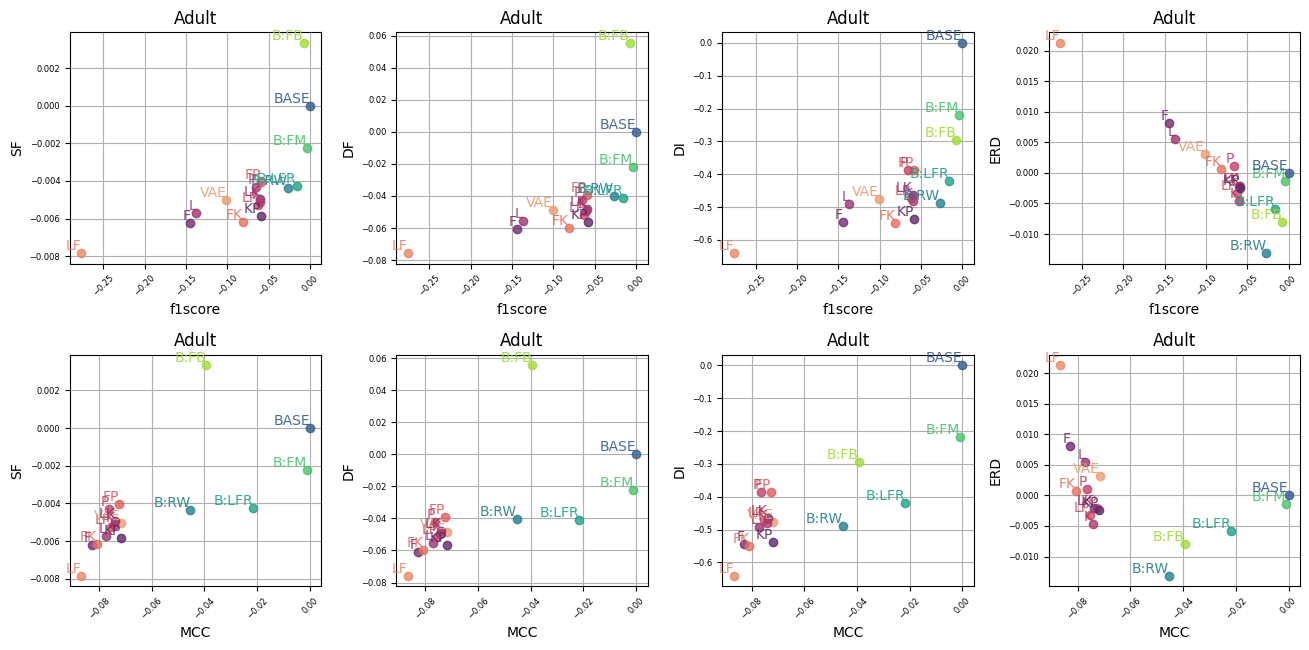

File 'results\RESULTS_race.csv' successfully loaded as DataFrame.


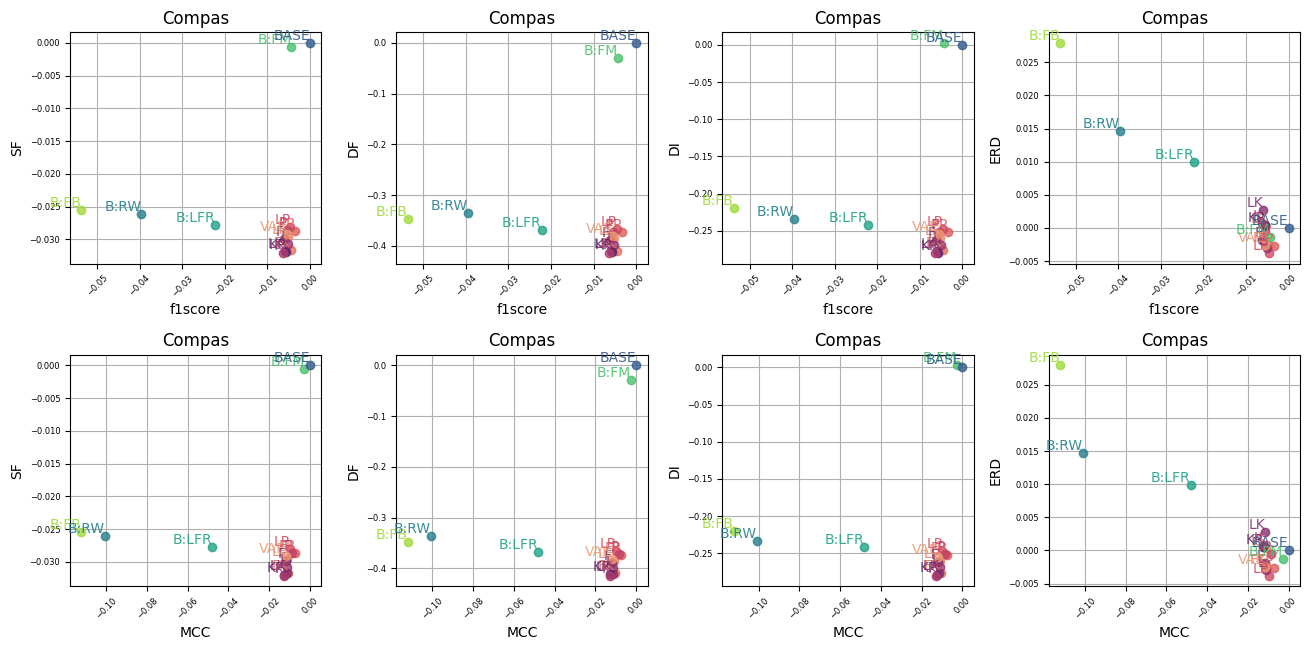

File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.


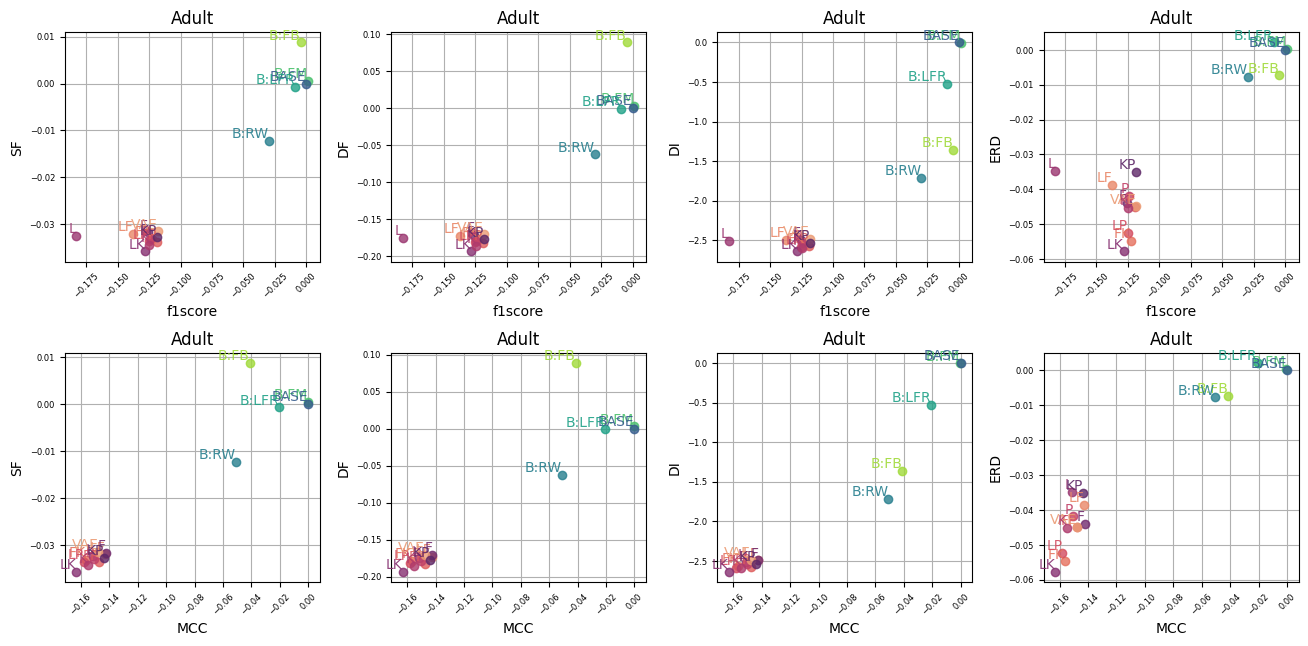

File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.


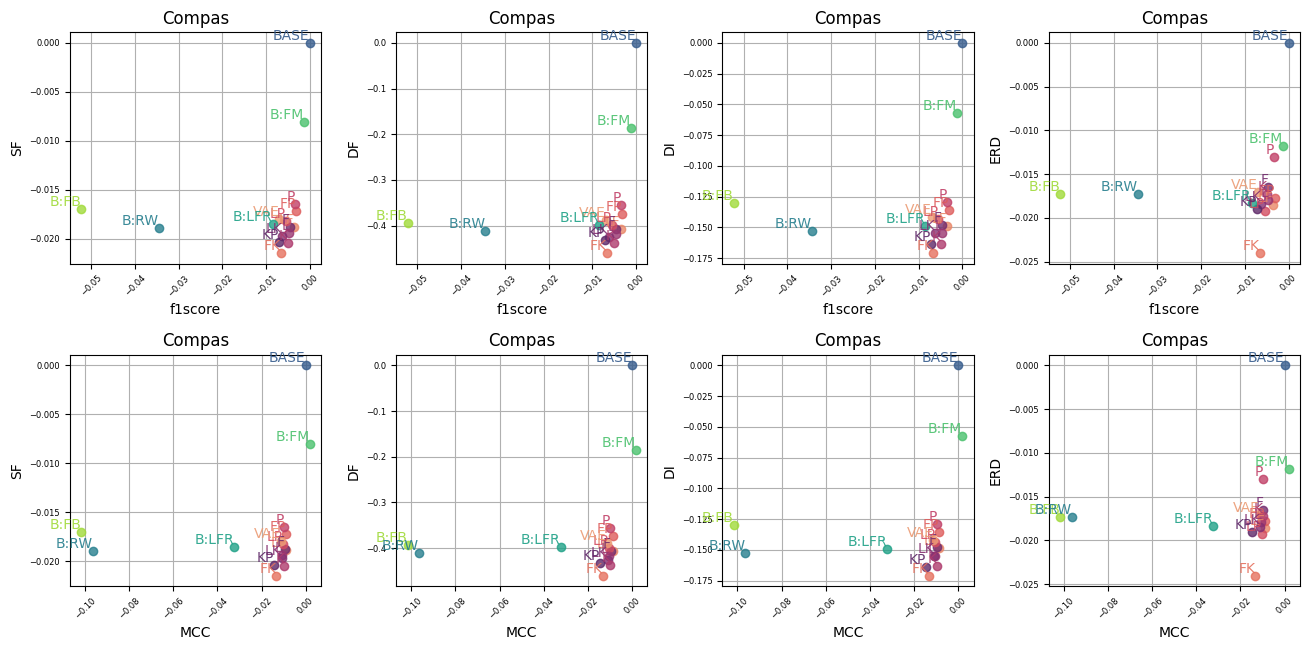

In [123]:
metrics_to_use = ["SF", "DF", "DI", "ERD"] 

for i in range(5):
    plot_multiple_metrics(files[i], datasets[i], metrics_to_use=metrics_to_use, size=size)
    axes[i].set_title(titles)
        
        

File 'results\RESULTS_race_sex.csv' successfully loaded as DataFrame.


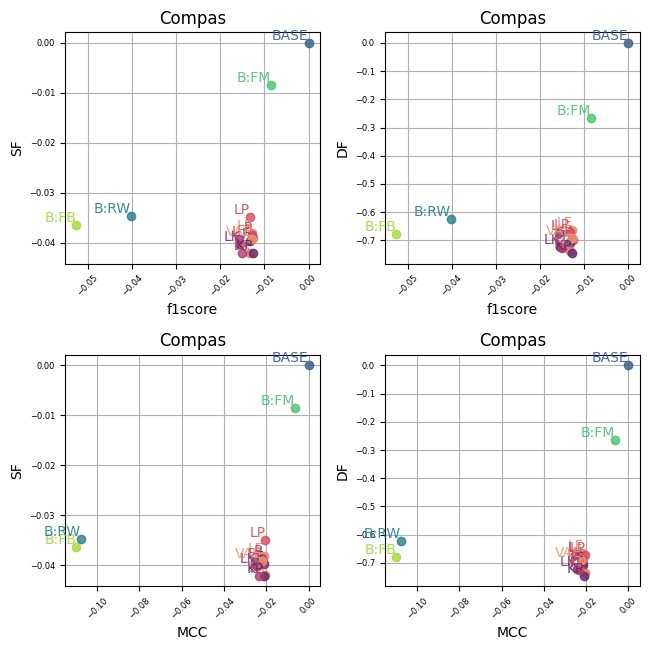

File 'results\RESULTS_race_sex.csv' successfully loaded as DataFrame.


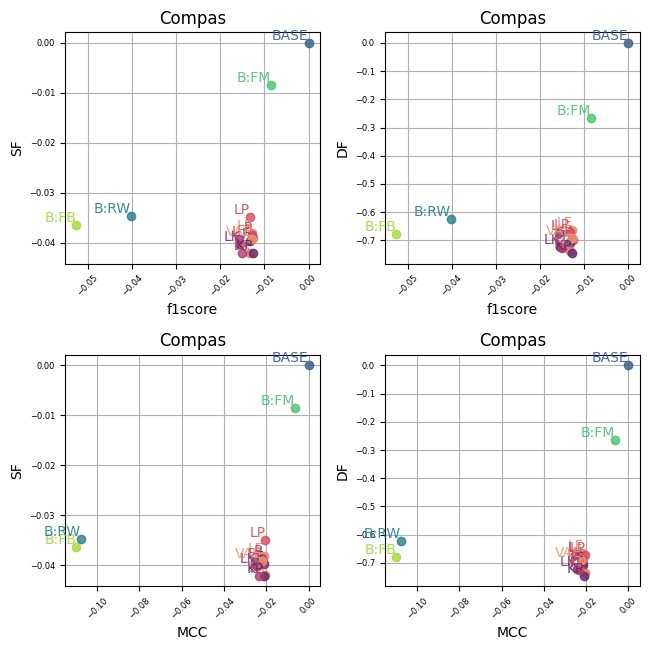

In [127]:
metrics_to_use = ["SF", "DF"] 

for i in range(2):
    plot_multiple_metrics(multi_files[i], multi_datasets[i], metrics_to_use=metrics_to_use, size=size)
    axes[i].set_title(multi_titles)
        

File 'results\defualt_sex.csv' successfully loaded as DataFrame.


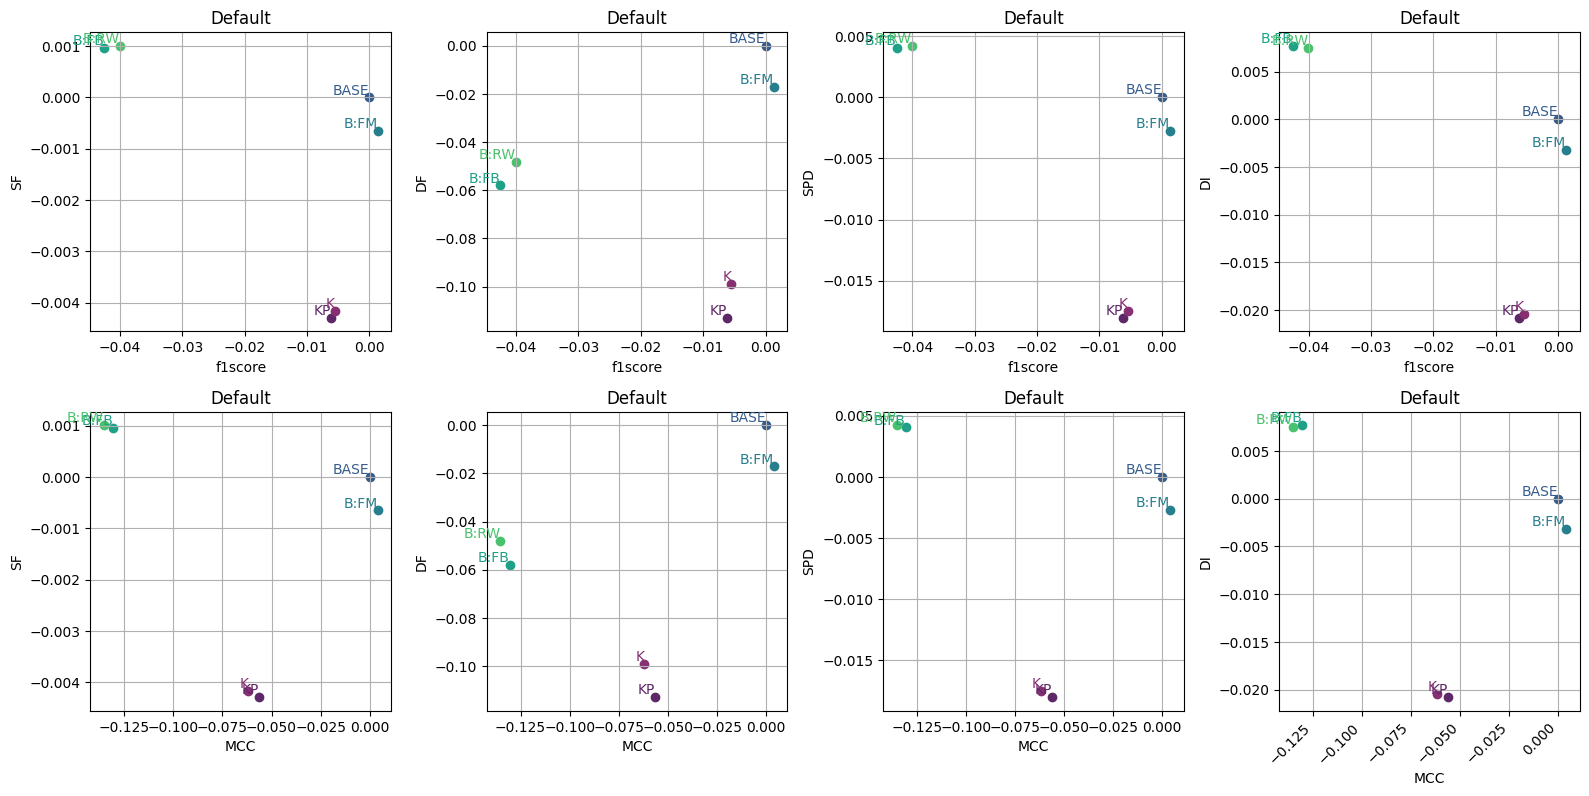

File 'results\RESULTS_race.csv' successfully loaded as DataFrame.


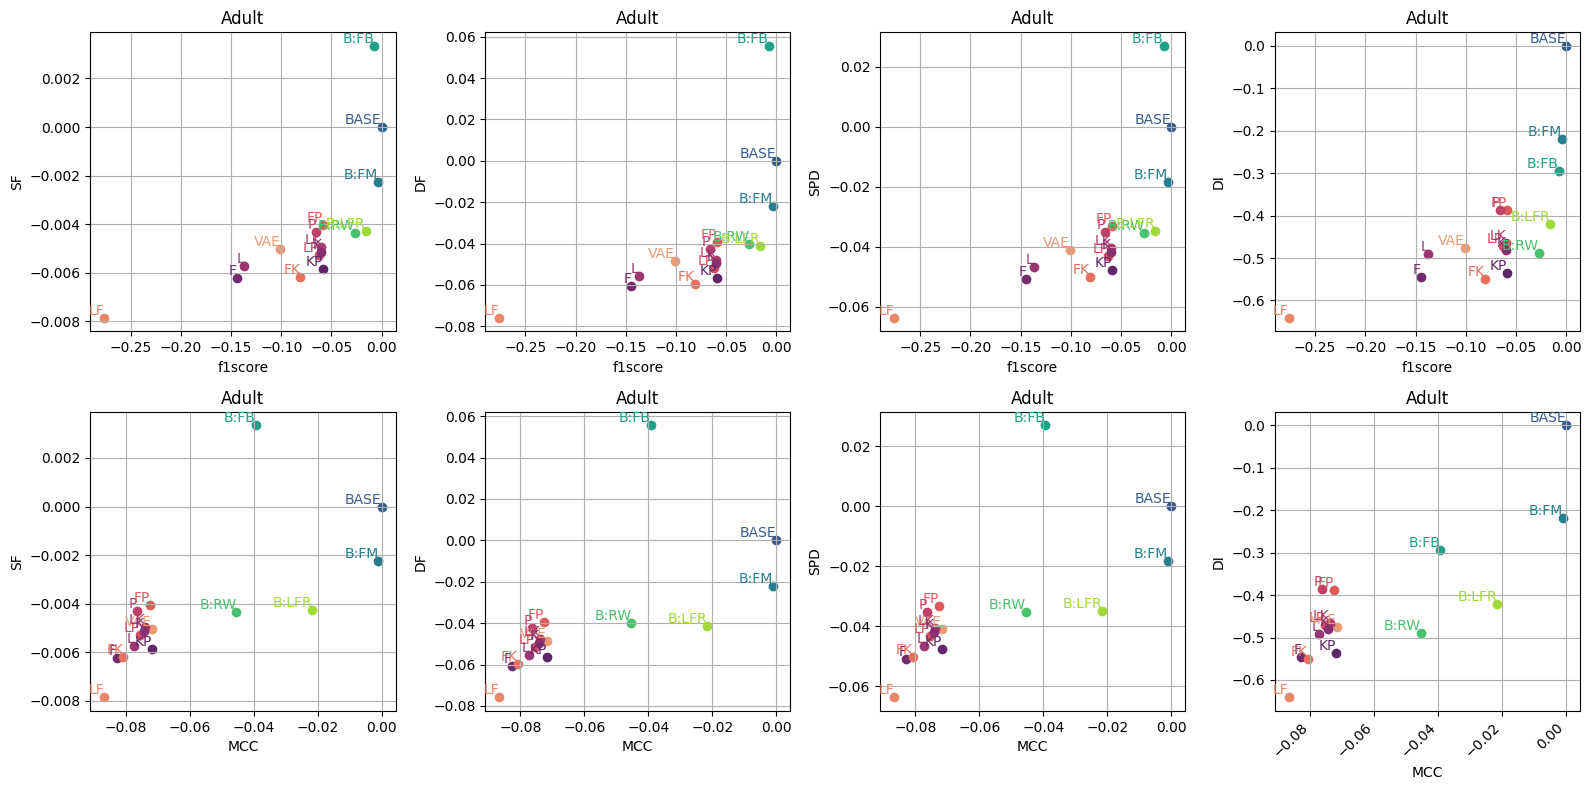

File 'results\RESULTS_race.csv' successfully loaded as DataFrame.


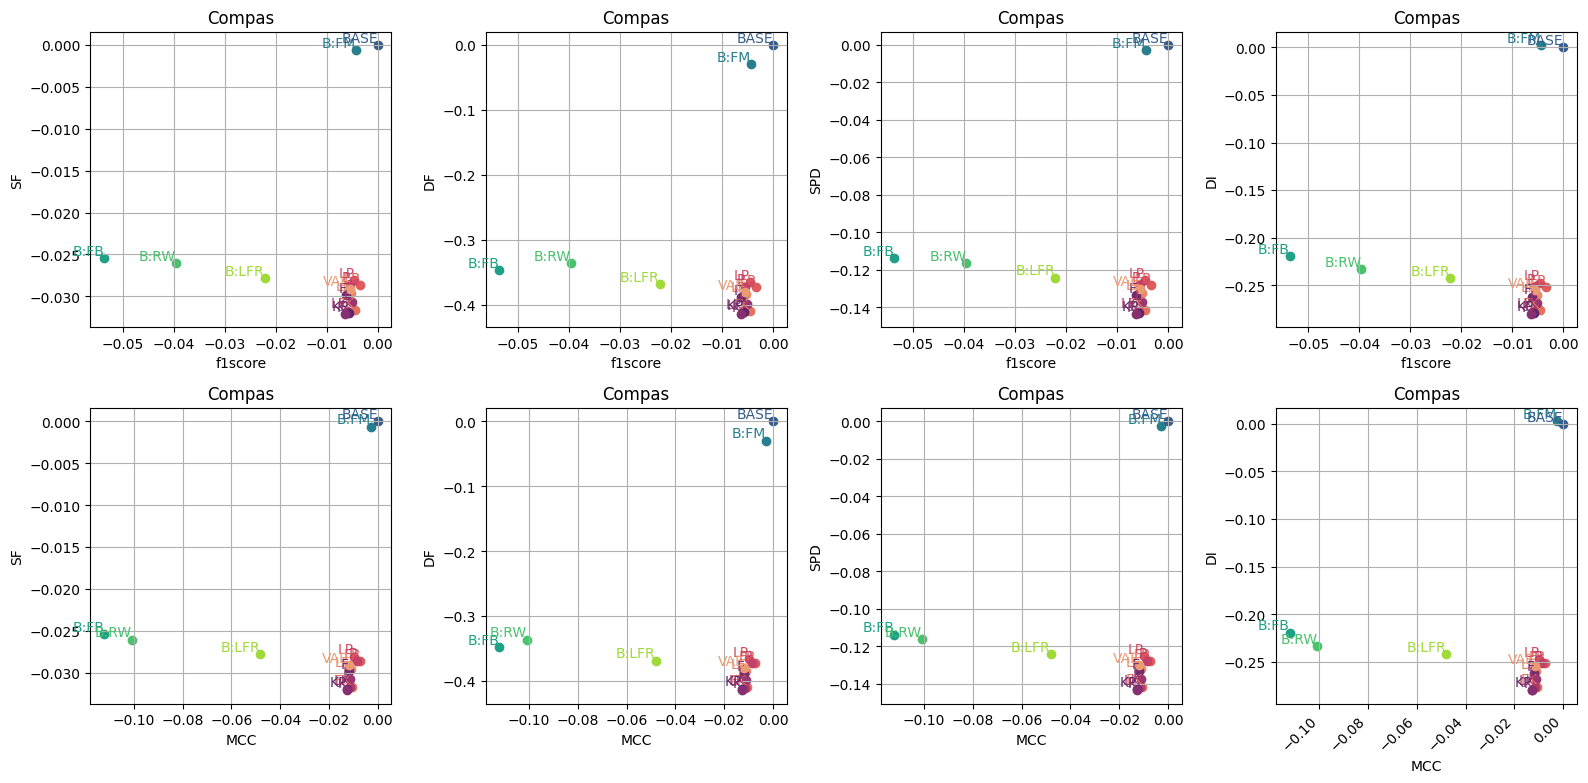

File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.


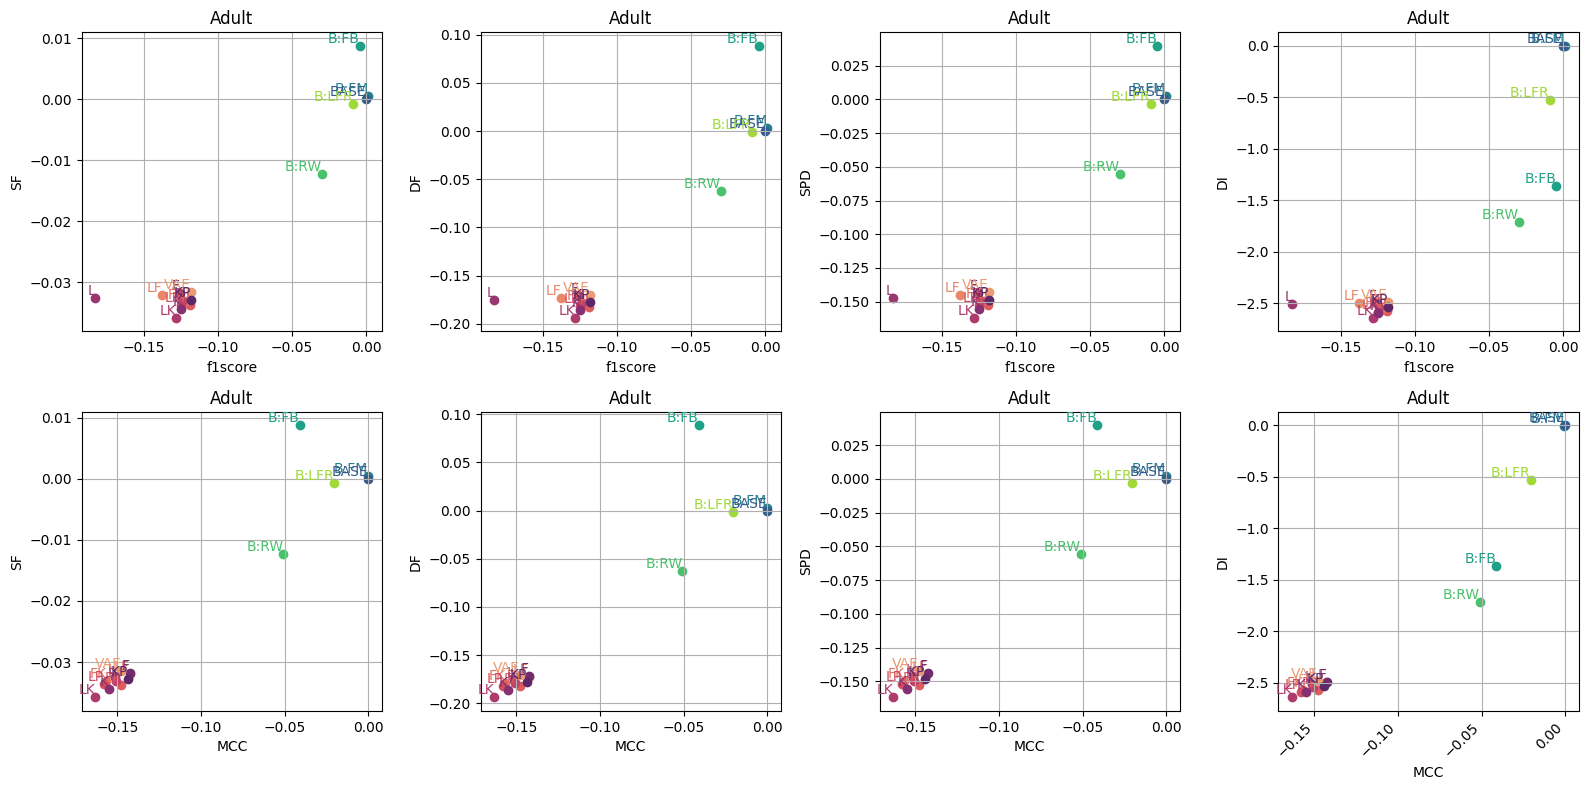

File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.


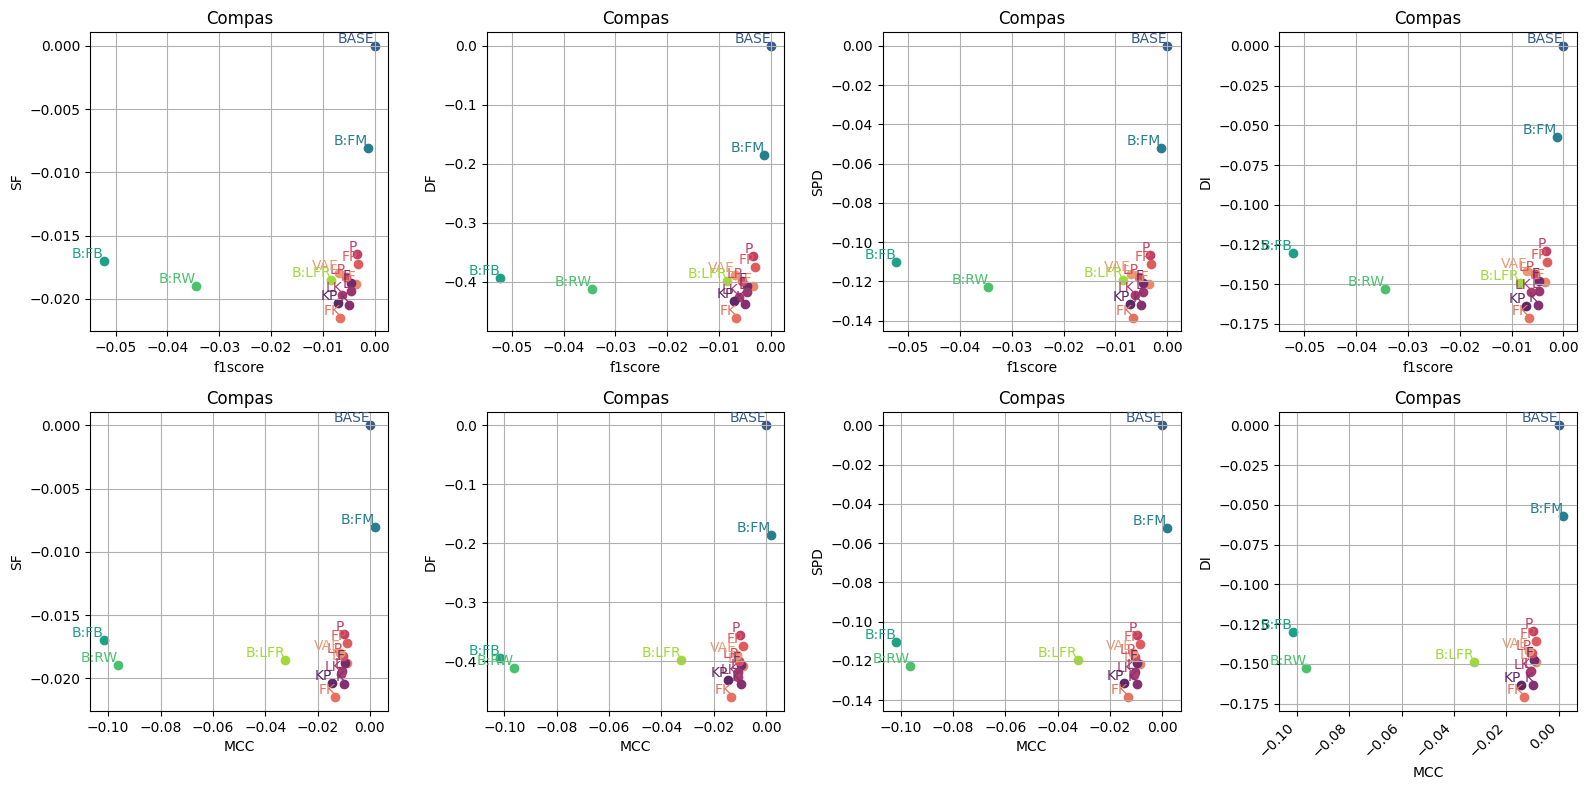

In [12]:
plot_multiple_metrics(os.path.join("results","defualt_sex.csv"), 'Default')


for attr in [["race"], ["sex"]]:            # , ["race", "sex"]
    files = [os.path.join("results","RESULTS_"+'_'.join(attr)+".csv")]
    
    for dataset in ["Adult", "Compas"]:
        plot_multiple_metrics(files, dataset)
        
        
